In [2]:
import googlemaps
import pandas as pd
import json
from api_key import api_key
import polyline

# Replace 'YOUR_API_KEY' with your actual API key


In [3]:
# Replace "api_key" with your actual API key
'''to get api key from google:Sign up for a Google Cloud account and enable the Maps API:
 Go to the Google Cloud Console (https://console.cloud.google.com) and create a new project.
Enable the "Maps JavaScript API" and the "Directions API" for your project.
'''
#the billing is free for the first 300 dolars so do not worry about the pricing but still check the website billing
#I think for this part billing can be closed anyway so no payment guaranteed

api_key = api_key
gmaps = googlemaps.Client(key=api_key)

In [4]:

def data_collection_manual(searched_item):
    total = []
    df = gmaps.places(query = searched_item)
    df = json.dumps(df)
    df = json.loads(df)
    df = pd.DataFrame(df["results"])
    total.append(df.iloc[:1])
    df = pd.concat(total)
    return df

def get_lat_long(df):

    df["Latitude"] = df["geometry"].astype(str).str.extract(':(.{,45})')
    df["Latitude"] = df["Latitude"].str.split(',').str[0]
    df["Latitude"] = df["Latitude"].str[8:]
  
    df["Longitude"] = df["geometry"].astype(str).str.split(",").str[1]
    df["Longitude"] = df["Longitude"].astype(str).str[7:]
    df["Longitude"] = df["Longitude"].astype(str).str[:-1]
    return df["Latitude"][0],df["Longitude"][0]



def get_road_distance(location1, location2):
    location1_long_lat = get_lat_long(data_collection_manual(location1))
    location2_long_lat  = get_lat_long(data_collection_manual(location2))
    result = gmaps.distance_matrix(location1_long_lat, location2_long_lat, mode='driving')
    distance = result['rows'][0]['elements'][0]['distance']['text']
    return distance   

In [5]:
data_collection_manual("ankamall avm")

,business_status,formatted_address,geometry,icon,icon_background_color,icon_mask_base_uri,name,opening_hours,photos,place_id,plus_code,rating,reference,types,user_ratings_total,price_level
0,OPERATIONAL,"Gazi, Konya Devlet Yolu, Mevlana Blv. No:2, 06...","{'location': {'lat': 39.9504171, 'lng': 32.831...",https://maps.gstatic.com/mapfiles/place_api/ic...,#4B96F3,https://maps.gstatic.com/mapfiles/place_api/ic...,ANKAmall,{'open_now': True},"[{'height': 2240, 'html_attributions': ['<a hr...",ChIJ3euM5ZVO0xQRilR8Be2HpLA,"{'compound_code': 'XR2J+5G Yenimahalle, Ankara...",4.3,ChIJ3euM5ZVO0xQRilR8Be2HpLA,"[shopping_mall, point_of_interest, establishment]",62000,NaN


In [6]:
float(get_lat_long(data_collection_manual("ankamall avm"))[0])

39.9504171

In [7]:
get_road_distance("ankamall avm","metromall avm")

'22.9 km'

In [8]:
get_road_distance("çankaya belediyesi","etimesgut belediyesi")

'20.3 km'

In [9]:
import folium

def visualize_route(origin_lat, origin_lng, destination_lat, destination_lng):
    
    directions = gmaps.directions(
        (origin_lat, origin_lng),
        (destination_lat, destination_lng),
        mode='driving'
    )

    # Extract the polyline from the directions response
    polyline_points = directions[0]['overview_polyline']['points']

    # Decode the polyline (ı had an error before decoding so ı had to decode it 
    decoded_polyline = polyline.decode(polyline_points)

    #initial map 
    my_map = folium.Map(location=[origin_lat, origin_lng], zoom_start=10)

    # Markers for locations 
    folium.Marker([origin_lat, origin_lng], tooltip='Origin').add_to(my_map)
    folium.Marker([destination_lat, destination_lng], tooltip='Destination').add_to(my_map)

    # Plotting
    folium.PolyLine(locations=decoded_polyline, color='blue', weight=5).add_to(my_map)

    
    return my_map



In [10]:
map =visualize_route(float(get_lat_long(data_collection_manual("ankamall avm"))[0]),float(get_lat_long(data_collection_manual("ankamall avm"))[1])
                ,float(get_lat_long(data_collection_manual("metromall avm"))[0]),float(get_lat_long(data_collection_manual("metromall"))[1]))
map.save("route.html")

In [11]:
map

In [136]:
#trick is to get spesific names for the locations 
#location names should be checked properly
muhtarlık_yenimah =data_collection_manual("yenimahalle muhtarlık")

In [137]:
muhtarlık_yenimah

,business_status,formatted_address,geometry,icon,icon_background_color,icon_mask_base_uri,name,opening_hours,place_id,plus_code,rating,reference,types,user_ratings_total,photos
0,OPERATIONAL,"Emniyet, Alemdar Sk. no:2, 06560 Yenimahalle/A...","{'location': {'lat': 39.94364720000001, 'lng':...",https://maps.gstatic.com/mapfiles/place_api/ic...,#7B9EB0,https://maps.gstatic.com/mapfiles/place_api/ic...,Emniyet Mahallesi Muhtarlığı,{'open_now': False},ChIJtXJjnMVO0xQR7G4GwT7UYTc,"{'compound_code': 'WRV9+FM Yenimahalle, Ankara...",4.4,ChIJtXJjnMVO0xQR7G4GwT7UYTc,"[local_government_office, point_of_interest, e...",7,NaN


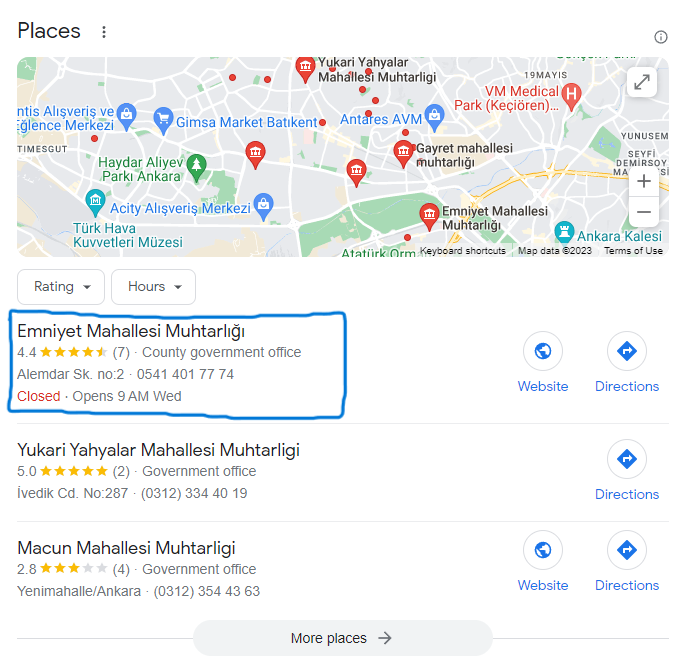

In [139]:
#this script get the top result in google it can be adjusted to get first n places 
#but google has good algorithm to get the required location anyway.  

from IPython.display import Image
display(Image(filename='location.png'))